In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import neighbors, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('sgemm_product.csv')
sns.set()

In [3]:
print("Number of nulls for each column:")
print(df.isnull().sum())
print(df.shape)

Number of nulls for each column:
MWG          0
NWG          0
KWG          0
MDIMC        0
NDIMC        0
MDIMA        0
NDIMB        0
KWI          0
VWM          0
VWN          0
STRM         0
STRN         0
SA           0
SB           0
Run1 (ms)    0
Run2 (ms)    0
Run3 (ms)    0
Run4 (ms)    0
dtype: int64
(18316, 18)


In [4]:
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)
df = df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,118.6625


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18316 entries, 0 to 18315
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MWG      18316 non-null  int64  
 1   NWG      18316 non-null  int64  
 2   KWG      18316 non-null  int64  
 3   MDIMC    18316 non-null  int64  
 4   NDIMC    18316 non-null  int64  
 5   MDIMA    18316 non-null  int64  
 6   NDIMB    18316 non-null  int64  
 7   KWI      18316 non-null  int64  
 8   VWM      18316 non-null  int64  
 9   VWN      18316 non-null  int64  
 10  STRM     18316 non-null  int64  
 11  STRN     18316 non-null  int64  
 12  SA       18316 non-null  int64  
 13  SB       18316 non-null  int64  
 14  Runtime  18316 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 2.1 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12ac2ff1d0>,
      dtype=object)

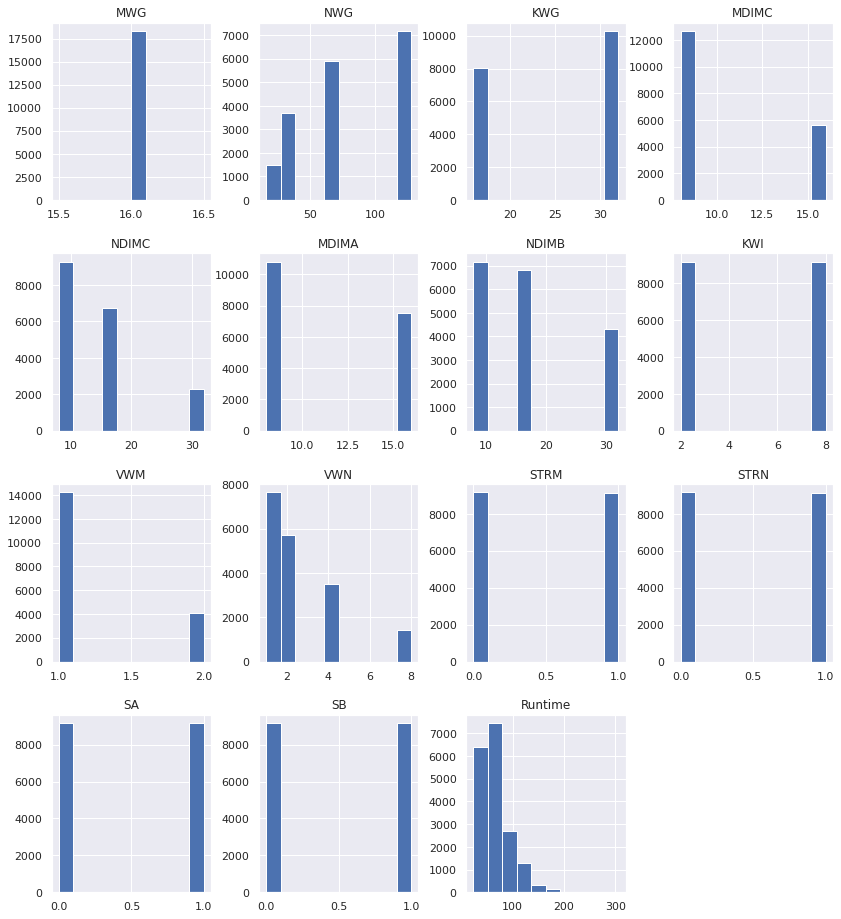

In [6]:
sns.set()
df.hist(figsize=(14,16))

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,18316.0,16.000000,0.000000,16.00,16.000,16.00000,16.00000,16.0000
NWG,18316.0,78.661717,42.278969,16.00,32.000,64.00000,128.00000,128.0000
KWG,18316.0,24.983621,7.939517,16.00,16.000,32.00000,32.00000,32.0000
MDIMC,18316.0,10.465167,3.693918,8.00,8.000,8.00000,16.00000,16.0000
NDIMC,18316.0,13.959380,7.776126,8.00,8.000,8.00000,16.00000,32.0000
MDIMA,18316.0,11.284560,3.935606,8.00,8.000,8.00000,16.00000,16.0000
NDIMB,18316.0,16.653418,9.228864,8.00,8.000,16.00000,16.00000,32.0000
KWI,18316.0,4.998035,3.000081,2.00,2.000,2.00000,8.00000,8.0000
VWM,18316.0,1.223630,0.416688,1.00,1.000,1.00000,1.00000,2.0000
VWN,18316.0,2.439616,1.955109,1.00,1.000,2.00000,4.00000,8.0000


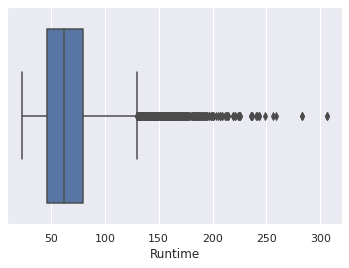

In [8]:
sns.boxplot(x=df['Runtime']);

In [9]:
Q1=df['Runtime'].quantile(0.25)
Q3=df['Runtime'].quantile(0.75)
IQR = Q3 - Q1
MIN=Q1-1.5*IQR
MAX=Q3+1.5*IQR
df = df[(df.Runtime>MIN) & (df.Runtime<MAX)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,17641.0,16.000000,0.000000,16.00,16.0000,16.000,16.0000,16.000
NWG,17641.0,78.065416,41.813076,16.00,32.0000,64.000,128.0000,128.000
KWG,17641.0,24.782269,7.961887,16.00,16.0000,32.000,32.0000,32.000
MDIMC,17641.0,10.466073,3.694299,8.00,8.0000,8.000,16.0000,16.000
NDIMC,17641.0,14.056800,7.831832,8.00,8.0000,8.000,16.0000,32.000
MDIMA,17641.0,11.280540,3.934877,8.00,8.0000,8.000,16.0000,16.000
NDIMB,17641.0,16.735559,9.265617,8.00,8.0000,16.000,16.0000,32.000
KWI,17641.0,5.006972,3.000077,2.00,2.0000,8.000,8.0000,8.000
VWM,17641.0,1.225781,0.418107,1.00,1.0000,1.000,1.0000,2.000
VWN,17641.0,2.450655,1.947603,1.00,1.0000,2.000,4.0000,8.000


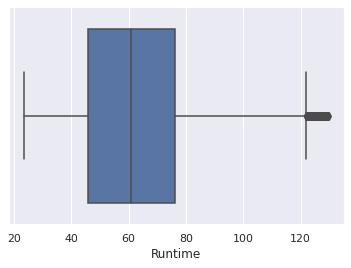

In [10]:
sns.boxplot(x=df['Runtime']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


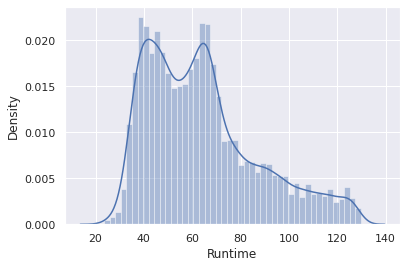

In [11]:
sns.distplot(df['Runtime'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


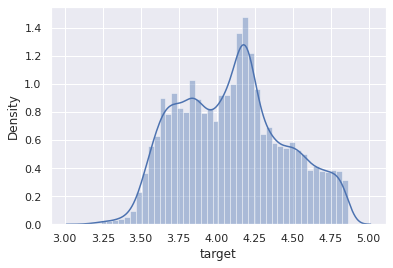

In [12]:
df['target']=np.log(df.Runtime)
sns.distplot(df['target'])

Text(0.5, 1.0, 'Variable Correlation')

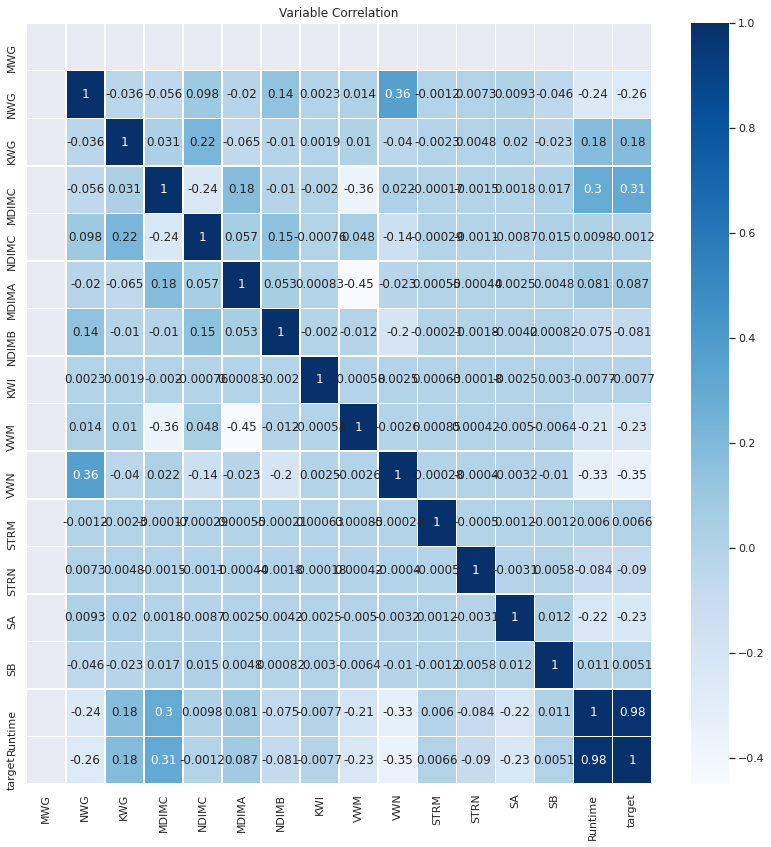

In [13]:
plt.figure(figsize=(14,14))
ax = sns.heatmap(df.corr(),annot=True, linewidths=.5, cmap=plt.cm.Blues)
plt.title('Variable Correlation')

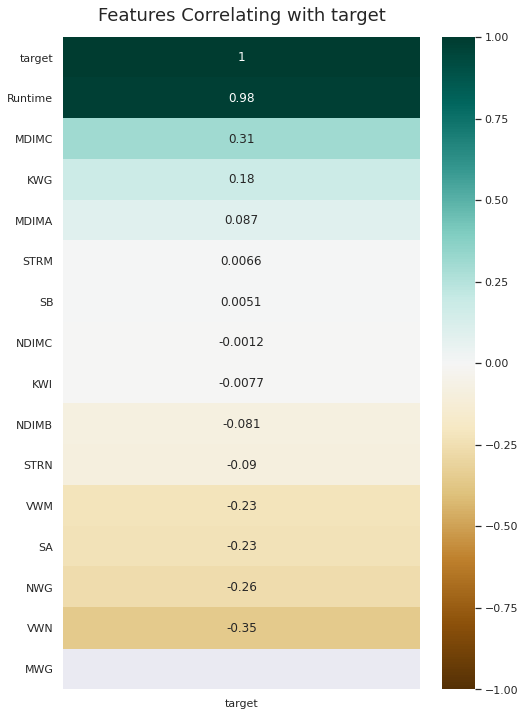

In [14]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['target']].sort_values(by='target', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with target', fontdict={'fontsize':18}, pad=16);

In [15]:
df_target = df[['target']]
Y = df_target.to_numpy().ravel()
df_features = df.drop(columns=['target','Runtime'])
X = df_features.to_numpy()

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 1.]]


MSE with alpha=0.0001: 0.0781140658262285  /  N iterations to converge: 11
MSE with alpha=0.001: 0.07829216128234416  /  N iterations to converge: 11
MSE with alpha=0.01: 0.07860686870984901  /  N iterations to converge: 10
MSE with alpha=0.05: 0.08096665010311684  /  N iterations to converge: 10
MSE with alpha=0.1: 0.08461185279302297  /  N iterations to converge: 9
MSE with alpha=0.2: 0.0898146896938371  /  N iterations to converge: 8
MSE with alpha=0.3: 0.09446226972630284  /  N iterations to converge: 8
MSE with alpha=0.4: 0.09772732500163928  /  N iterations to converge: 8
MSE with alpha=0.5: 0.10007925860128489  /  N iterations to converge: 7
MSE with alpha=0.6: 0.10206043041421756  /  N iterations to converge: 7
MSE with alpha=0.7: 0.10457924454661077  /  N iterations to converge: 7


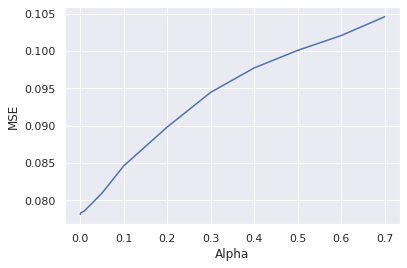

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
list_alpha = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
list_MSE = []

for i in list_alpha:
    regr = SGDRegressor(alpha = i)
    regr.fit(X_train, Y_train)
    Y_pred = regr.predict(X_test)
    MSE = mean_squared_error(Y_test, Y_pred)
    list_MSE.append(MSE)
    print(f'MSE with alpha={i}: {MSE}  /  N iterations to converge: {regr.n_iter_}')
    
plt.plot(list_alpha,list_MSE)
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.show()

In [18]:
for i in range(0,10):
    X = df_features.sample(axis = 1,random_state=i,n=8) 
    print(f'Using features: {X.columns}')
    X = X.to_numpy()
    X = scaler.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

    regr = SGDRegressor(alpha = 0.0001)
    MSE = cross_val_score(regr, X_train, Y_train, cv=5, scoring = "neg_mean_squared_error").mean()
    MSE = abs(MSE)
    print(f'MSE: {MSE}')

Using features: Index(['VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN', 'NWG'], dtype='object')
MSE: 0.09210058794027727
Using features: Index(['MDIMC', 'KWI', 'NDIMB', 'KWG', 'STRM', 'NDIMC', 'NWG', 'SA'], dtype='object')
MSE: 0.09279537062814135
Using features: Index(['STRN', 'NDIMC', 'MDIMA', 'MWG', 'VWN', 'MDIMC', 'NWG', 'STRM'], dtype='object')
MSE: 0.09092892215735046
Using features: Index(['KWI', 'NDIMC', 'NWG', 'KWG', 'SB', 'NDIMB', 'MDIMA', 'MWG'], dtype='object')
MSE: 0.10910977185792907
Using features: Index(['NDIMC', 'MDIMC', 'STRN', 'VWN', 'NDIMB', 'SB', 'KWG', 'MWG'], dtype='object')
MSE: 0.08768046927810569
Using features: Index(['MDIMA', 'NWG', 'KWI', 'KWG', 'STRM', 'SB', 'STRN', 'NDIMC'], dtype='object')
MSE: 0.10821795828926581
Using features: Index(['SB', 'SA', 'NDIMB', 'KWI', 'KWG', 'VWM', 'MDIMA', 'STRN'], dtype='object')
MSE: 0.10173031900656744
Using features: Index(['SA', 'STRN', 'KWG', 'MDIMA', 'MWG', 'NWG', 'SB', 'VWM'], dtype='object')
MSE: 0.096811771351

In [19]:
best_features = ['MWG', 'SA','NWG',  'VWM','MDIMC', 'NDIMC','SB', 'STRM','NDIMB' ,'VWN', 'KWI','MDIMA','KWG', 'STRN']

In [20]:
list_MSE = []

for i in range(1,16):
    X = df_features[best_features[:i]]
    print(f'Using features: {X.columns}')
    X = X.to_numpy()
    X = scaler.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

    regr = SGDRegressor(alpha = 0.0001)
    MSE = cross_val_score(regr, X_train, Y_train, cv=5, scoring = "neg_mean_squared_error").mean()
    MSE = abs(MSE)
    list_MSE.append(MSE)
    print(f'MSE: {MSE}')

Using features: Index(['MWG'], dtype='object')
MSE: 0.12041922524407438
Using features: Index(['MWG', 'SA'], dtype='object')
MSE: 0.11489012982431257
Using features: Index(['MWG', 'SA', 'NWG'], dtype='object')
MSE: 0.10648032863831414
Using features: Index(['MWG', 'SA', 'NWG', 'VWM'], dtype='object')
MSE: 0.10090578544378195
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC'], dtype='object')
MSE: 0.09445740152862842
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC'], dtype='object')
MSE: 0.09300583991771876
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC', 'SB'], dtype='object')
MSE: 0.0916004853995813
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC', 'SB', 'STRM'], dtype='object')
MSE: 0.09396538149594234
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC', 'SB', 'STRM', 'NDIMB'], dtype='object')
MSE: 0.0938607690994068
Using features: Index(['MWG', 'SA', 'NWG', 'VWM', 'MDIMC', 'NDIMC', 'SB', 'STRM', 'NDIMB',


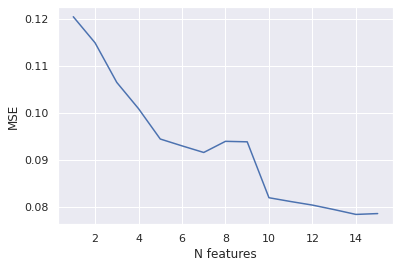

In [21]:
plt.plot(range(1,16),list_MSE)
plt.xlabel('N features')
plt.ylabel('MSE')
plt.show()

Using features: Index(['STRN'], dtype='object')
MSE: 0.12212435230316447
Using features: Index(['STRN', 'KWG'], dtype='object')
MSE: 0.11690993660628288
Using features: Index(['STRN', 'KWG', 'MDIMA'], dtype='object')
MSE: 0.11669251772879201
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI'], dtype='object')
MSE: 0.11522926324920676
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN'], dtype='object')
MSE: 0.10139802686980445
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB'], dtype='object')
MSE: 0.0987044966505545
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB', 'STRM'], dtype='object')
MSE: 0.09830877436510209
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB', 'STRM', 'SB'], dtype='object')
MSE: 0.09893650753441674
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB', 'STRM', 'SB', 'NDIMC'], dtype='object')
MSE: 0.09733038374450481
Using features: Index(['STRN', 'KWG', 'MDIMA', 'KWI', 'VWN', 'NDIMB

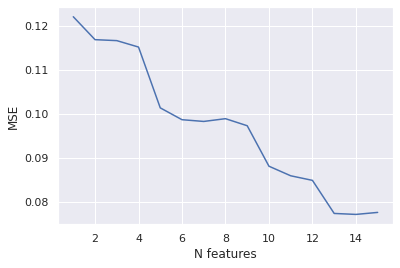

In [22]:
best_features.reverse()
list_MSE = []

for i in range(1,16):
    X = df_features[best_features[:i]]
    print(f'Using features: {X.columns}')
    X = X.to_numpy()
    X = scaler.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

    regr = SGDRegressor(alpha = 0.0001)
    MSE = cross_val_score(regr, X_train, Y_train, cv=5, scoring = "neg_mean_squared_error").mean()
    MSE = abs(MSE)
    list_MSE.append(MSE)
    print(f'MSE: {MSE}')
    
plt.plot(range(1,16),list_MSE)
plt.xlabel('N features')
plt.ylabel('MSE')
plt.show()

In [23]:
X = scaler.fit_transform(df_features)
df_target = pd.qcut(df['target'].values, q=4, labels=False)
Y = df_target.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [24]:
unique, counts = np.unique(Y, return_counts=True)
print(dict(zip(unique, counts)))

{0: 4412, 1: 4409, 2: 4410, 3: 4410}


Cross validation accuracy with K-fold=5: 0.47872008753105016
Test accuracy: 0.4895225008588114


Text(0.5, 1.0, 'Test Results')

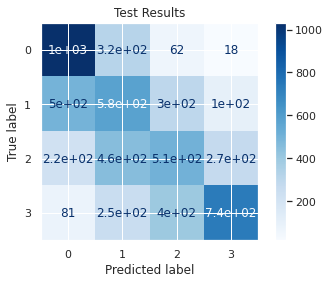

In [25]:
knn_classifier = neighbors.KNeighborsClassifier(n_neighbors=5)
knn_score = cross_val_score(knn_classifier, X_train, Y_train, cv = 5, scoring="accuracy")
score = knn_score.mean()
print(f'Cross validation accuracy with K-fold=5: {score}')

knn_classifier.fit(X_train, Y_train)
Y_pred = knn_classifier.predict(X_test)

print(f'Test accuracy: {metrics.accuracy_score(Y_test, Y_pred)}')

disp = metrics.plot_confusion_matrix(knn_classifier, X_test, Y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Test Results')

Cross validation accuracy with K-fold=5: 0.925374158720202
Test accuracy: 0.9503607007901065


Text(0.5, 1.0, 'Test Results')

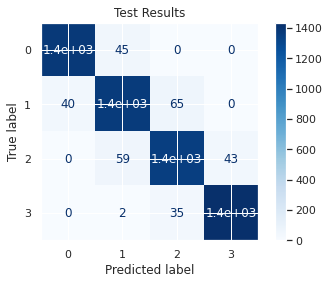

In [26]:
tree_classifier = tree.DecisionTreeClassifier()
tree_score = cross_val_score(tree_classifier, X_train, Y_train, cv = 5, scoring="accuracy")
score = tree_score.mean()
print(f'Cross validation accuracy with K-fold=5: {score}')

tree_classifier.fit(X_train, Y_train)
Y_pred = tree_classifier.predict(X_test)

print(f'Test accuracy: {metrics.accuracy_score(Y_test, Y_pred)}')

disp = metrics.plot_confusion_matrix(tree_classifier, X_test, Y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Test Results')